In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Expert/Downloads/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df=df.drop(columns=["Name","Cabin","Ticket","Age"])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [10]:
df["Embarked"]=df["Embarked"].fillna(method="pad")

In [11]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
np.unique(df["Sex"])

array(['female', 'male'], dtype=object)

In [13]:
np.unique(df["Embarked"])

array(['C', 'Q', 'S'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Sex"]=le.fit_transform(df["Sex"])

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2


In [16]:
df["Embarked"].value_counts()

2    644
0    169
1     78
Name: Embarked, dtype: int64

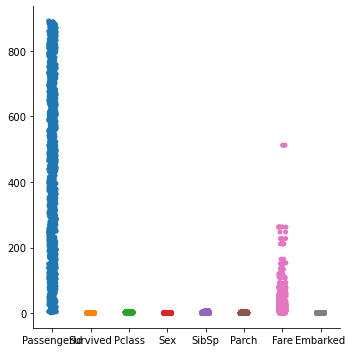

In [17]:
sns.catplot(data=df)

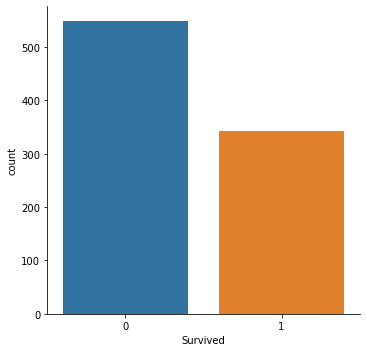

In [18]:
sns.catplot("Survived",data=df,kind="count")

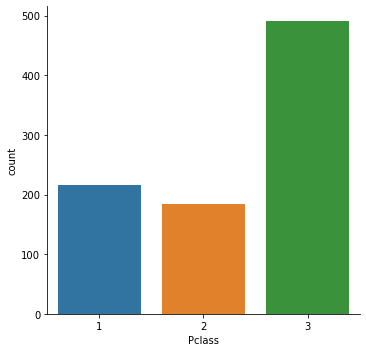

In [25]:
sns.catplot("Pclass",kind="count",data=df)

In [26]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x2119dbd9af0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x2119dc9a1f0>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x2119dbd9790>,
 'medians': [<matplotlib.lines.Line2D at 0x2119dc9a8b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2119dc9abb0>,
 'means': []}

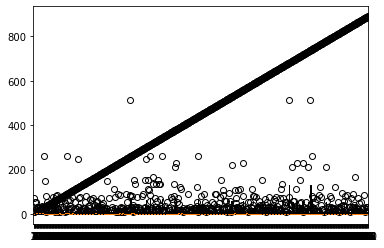

In [29]:
plt.boxplot(df)

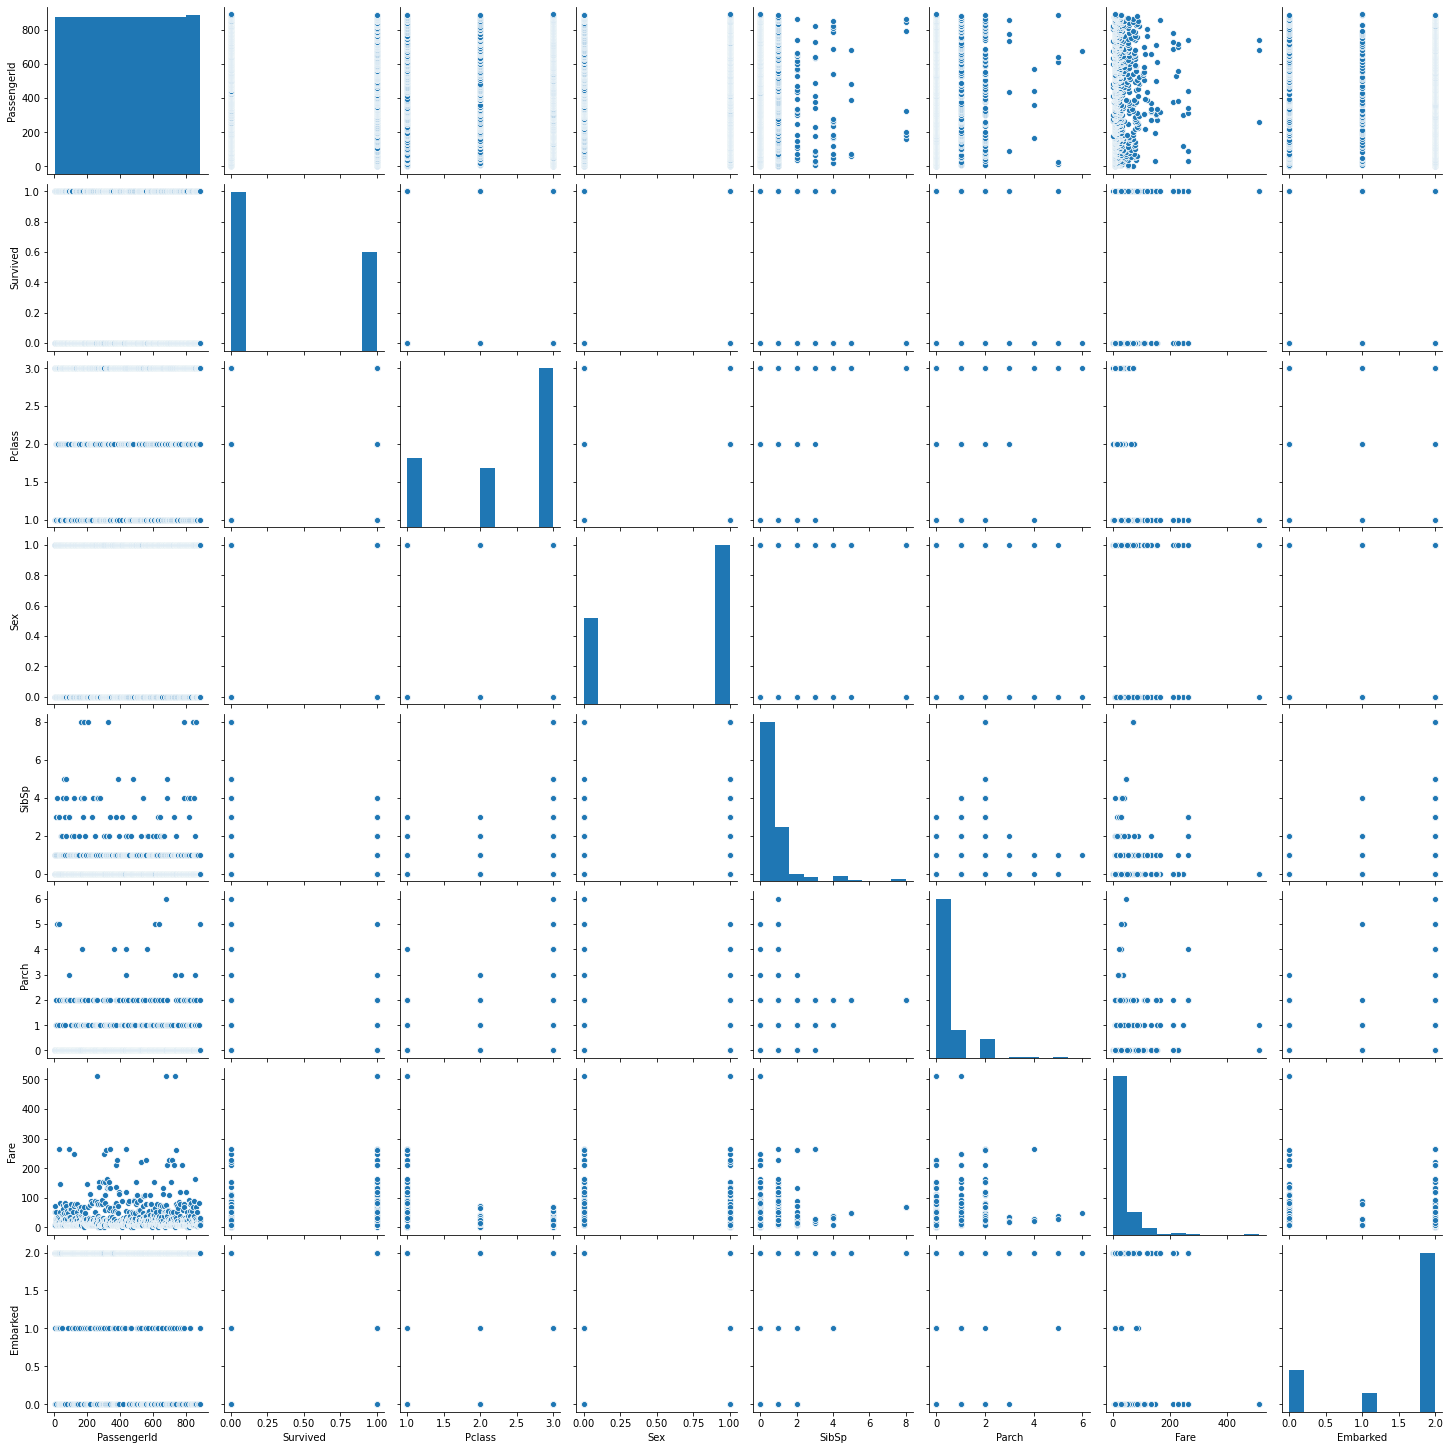

In [30]:
sns.pairplot(data=df)

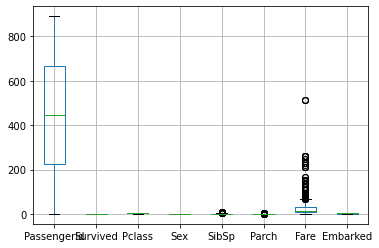

In [31]:
df.boxplot()

In [32]:
x=df.drop(columns="Embarked")
y=df["Embarked"]

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [40]:
#evaluation

accuracy is: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        39
           1       0.82      0.69      0.75        13
           2       0.85      0.92      0.89       127

    accuracy                           0.83       179
   macro avg       0.80      0.73      0.76       179
weighted avg       0.83      0.83      0.83       179



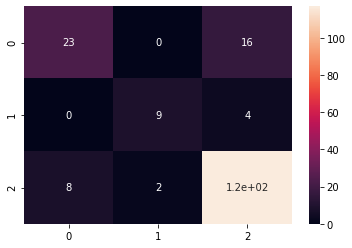

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

conclusion:accuracy of model with gradientboostingclassifier is 0.83

# LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print("R2 Score " ,r2_score(ytest,ypred))
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE :",np.sqrt(mse))

R2 Score  0.10925655883746566
MSE: 0.6107684966867726
MAE: 0.6504256050701579
RMSE : 0.7815167923255216


# GradientBoostingRegressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=50)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
#Evaluation of Model
print("R2 Score " ,r2_score(ytest,ypred))
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE :",np.sqrt(mse))

R2 Score  0.4363656365697821
MSE: 0.38647504648924463
MAE: 0.47271860729253135
RMSE : 0.621671172316398
